## Tubeness Filter (WIP: has bugs, descriptions not complete)

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@46956d8a

This `Op` does ....

In [2]:
ij.op().help("tubeness")

Available operations:
	(IterableInterval out?) =
	net.imagej.ops.filter.tubeness.DefaultTubeness(
		IterableInterval out?,
		RandomAccessibleInterval in,
		double sigma,
		double[] calibration)

This is how the Op works...

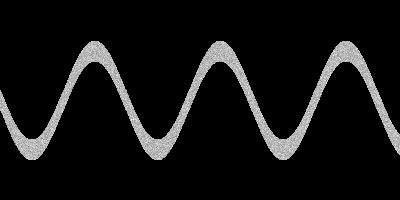

In [3]:
import net.imglib2.type.numeric.real.FloatType

tubeImg = ij.op().run("create.img", [400, 200], new FloatType())
randomAccess = tubeImg.randomAccess()
randomAccess.setPosition(0, 0)
randomAccess.setPosition(100, 1)
while(randomAccess.getLongPosition(0) < tubeImg.dimension(0)){
    x = randomAccess.getDoublePosition(0)
    y = (50 * Math.sin(x / 20)) as int
    for(offset in -10..10){
        randomAccess.setPosition(100 + y - offset, 1)
        randomAccess.get().set(120)
    }
    randomAccess.fwd(0)
}

input = ij.op().run("create.img", tubeImg)

ij.op().run("addPoissonNoise", input, tubeImg)

ij.notebook().display(input)

java.util.concurrent.ExecutionException: java.lang.NoClassDefFoundError: net/imglib2/loops/LoopBuilder$TriConsumer
	at java.util.concurrent.FutureTask.report(FutureTask.java:122)
	at java.util.concurrent.FutureTask.get(FutureTask.java:192)
	at net.imglib2.algorithm.gradient.PartialDerivative.gradientCentralDifferenceParallel(PartialDerivative.java:163)
	at net.imglib2.algorithm.gradient.HessianMatrix.calculateMatrix(HessianMatrix.java:284)
	at net.imglib2.algorithm.gradient.HessianMatrix.calculateMatrix(HessianMatrix.java:237)
	at net.imagej.ops.filter.tubeness.DefaultTubeness.compute(DefaultTubeness.java:175)
	at net.imagej.ops.filter.tubeness.DefaultTubeness.compute(DefaultTubeness.java:97)
	at net.imagej.ops.special.hybrid.UnaryHybridCF.run(UnaryHybridCF.java:75)
	at net.imagej.ops.special.hybrid.UnaryHybridCF.run(UnaryHybridCF.java:97)
	at org.scijava.command.CommandModule.run(CommandModule.java:199)
	at net.imagej.ops.OpEnvironment.run(OpEnvironment.java:944)
	at net.imagej.ops.Op

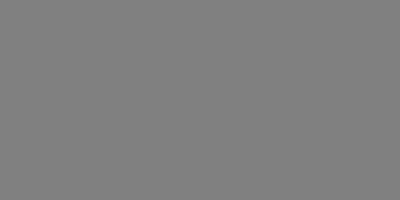

In [4]:
sigma = 5 / Math.sqrt(2)
calibration = [1, 1] as int[]
output = ij.op().run("create.img", input)

ij.op().run("tubeness", output, input, sigma, calibration)

ij.notebook().display(output)